In [2476]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import folium 
import requests
import warnings 
warnings.filterwarnings('ignore')

Loading data

In [2477]:
df = pd.read_csv('adult.csv')

In [2478]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2479]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 48842 rows and 15 columns.


Column Labels

In [2480]:
df.columns = df.columns.str.replace("-", "_")

# Print the modified column labels
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [2481]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [2482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [2483]:
df.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [2484]:
df.shape

(48842, 15)

checking null values

In [2485]:

null_counts = df.isna().sum()
null_counts



age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [2486]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Checking nan values

Dropping the missing value rows 

In [2487]:
df.dropna(how = 'any', inplace = True )

In [2488]:
print(f"After cleaning the dataset we get {df.shape[0]} rows and {df.shape[1]} columns in our detaset.")

After cleaning the dataset we get 48842 rows and 15 columns in our detaset.


checking duplicates

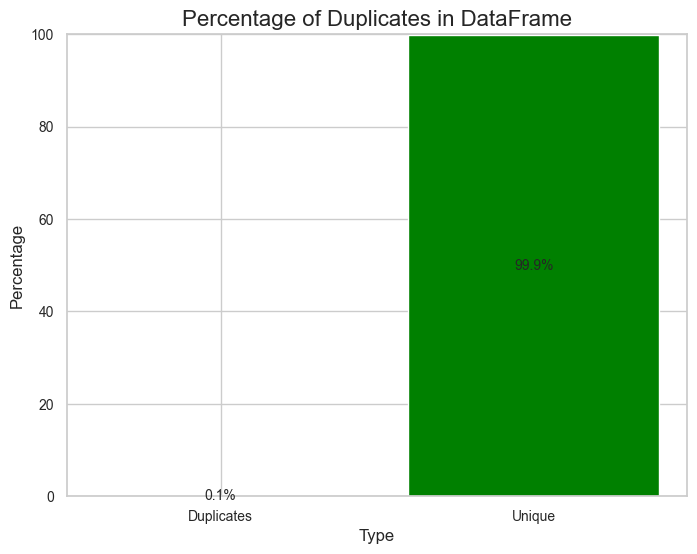

In [2489]:
duplicate_percentage = (df[df.duplicated()].shape[0] / df.shape[0]) * 100
unique_percentage = 100 - duplicate_percentage

# Creating the plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Duplicates', 'Unique'], [duplicate_percentage, unique_percentage], color=['orange', 'green'])
plt.title('Percentage of Duplicates in DataFrame', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.ylim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add percentages at the middle of each bar's height
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.1f}%', ha='center', va='center', fontsize=10)

plt.show()

In [2490]:
df.drop_duplicates(inplace = True)

Numerical and categorical columns

In [2491]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:")
print(numerical_columns)
print()

print("Categorical columns:")
print(categorical_columns)

Numerical columns:
Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

Categorical columns:
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')


Numerical Columns


In [2492]:
numerical_columns

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [2493]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [2494]:
date_column=df['hours_per_week']
date_column

0        40
1        50
2        40
3        40
4        30
         ..
48837    38
48838    40
48839    40
48840    20
48841    40
Name: hours_per_week, Length: 48790, dtype: int64

In [2495]:
# Assuming 'df' is your DataFrame containing numerical columns

continuous_cols = []
discrete_cols = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        unique_values = df[column].nunique()
        total_values = len(df[column])
        
        # Determine the threshold for considering a column as continuous or discrete
        threshold = 0.05
        
        if unique_values / total_values < threshold:
            discrete_cols.append(column)
        else:
            continuous_cols.append(column)

print("Continuous columns:")
print(continuous_cols)

print("\nDiscrete columns:")
print(discrete_cols)

Continuous columns:
['fnlwgt']

Discrete columns:
['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [2496]:
continuous_cols=['fnlwgt']
Discrete_column=['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#### Pair plot

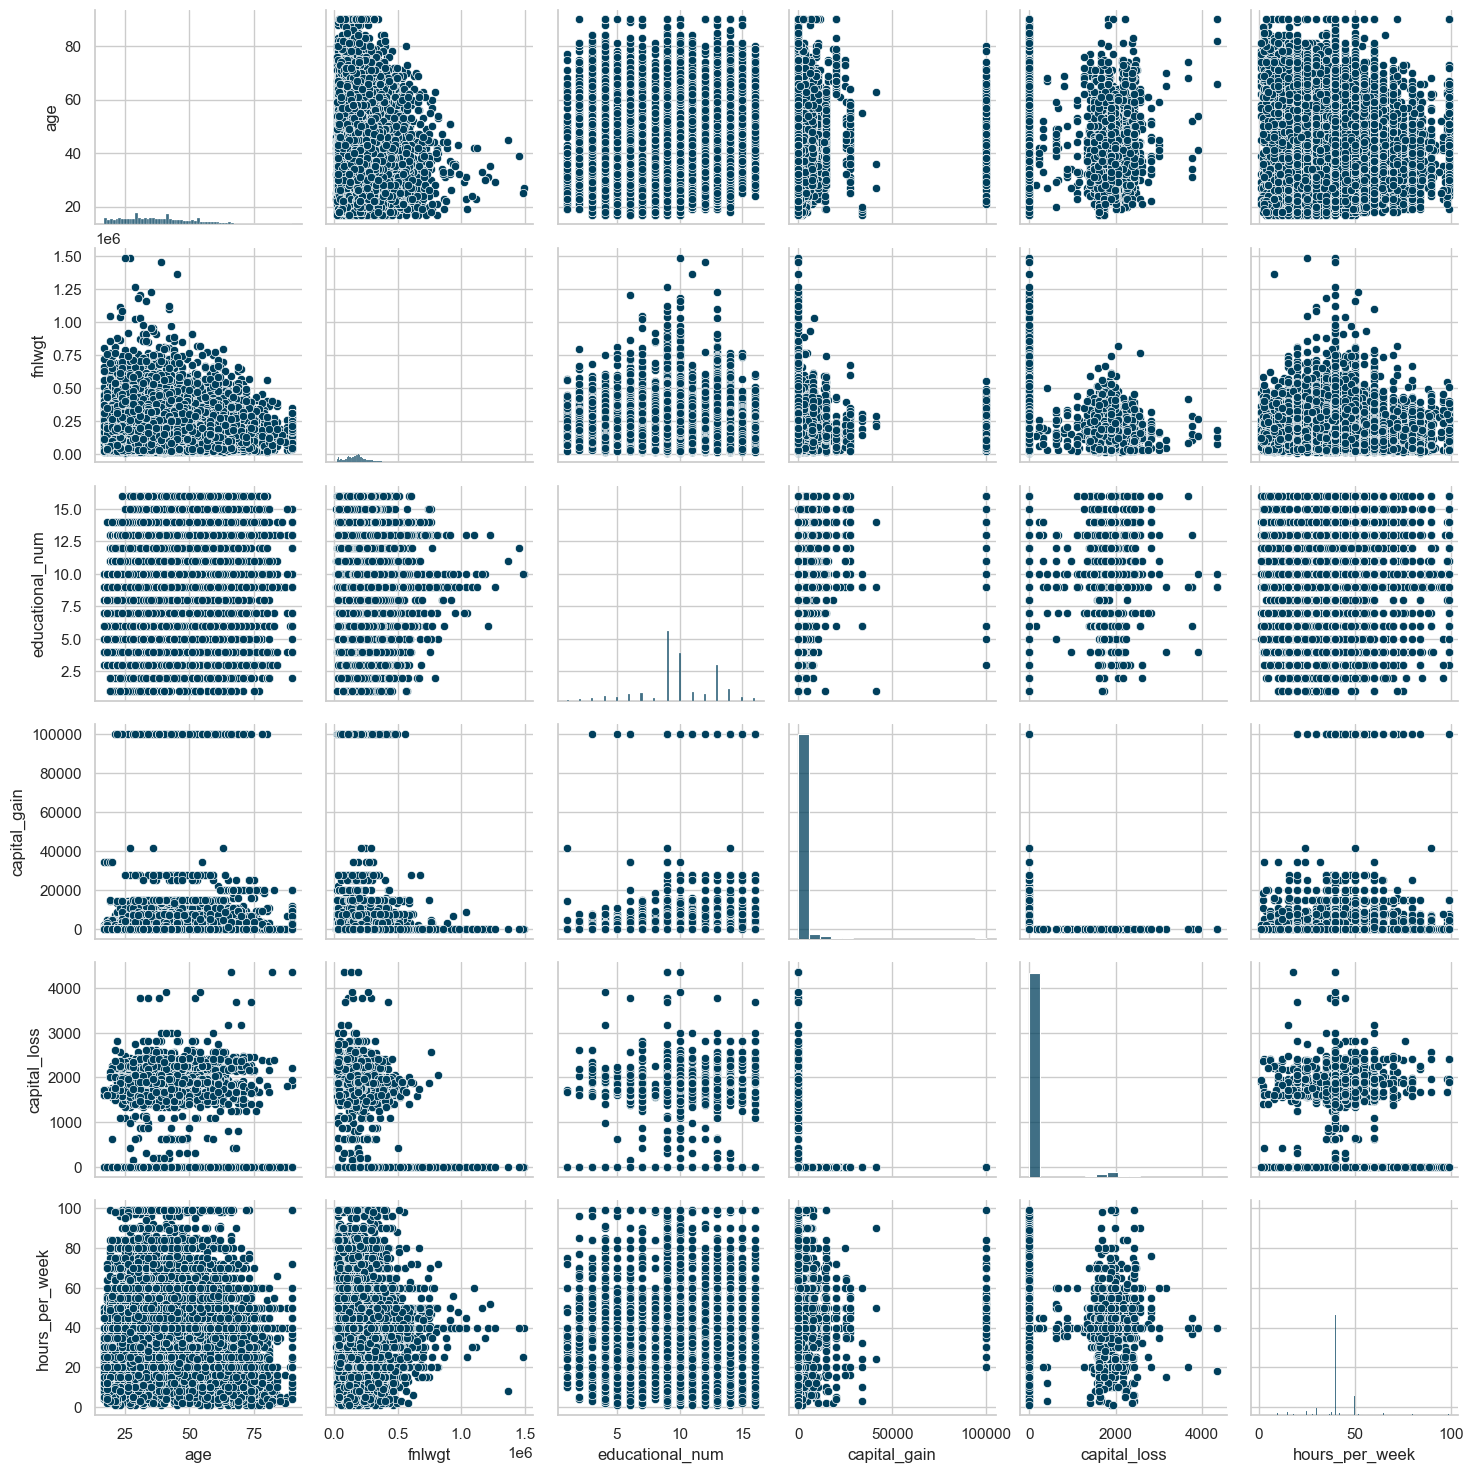

In [2497]:
# Get the list of numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a pair plot
sns.pairplot(df[numeric_cols])

# Display the plot
plt.show()

Heatmap

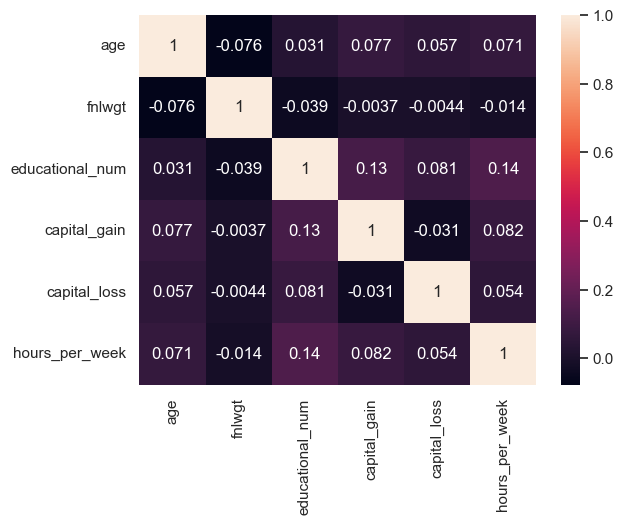

In [2498]:
sns.heatmap(df[numerical_columns].corr(), annot = True, );

In [2499]:
df['capital_gain']

0            0
1            0
2            0
3         7688
4            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital_gain, Length: 48790, dtype: int64

In [2500]:
df[['capital_gain','capital_loss']]

,capital_gain,capital_loss
0,0,0
1,0,0
2,0,0
3,7688,0
4,0,0
...,...,...
48837,0,0
48838,0,0
48839,0,0
48840,0,0


In [2501]:
numerical_columns

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [2502]:
numeric_cols=['age', 'fnlwgt', 'educational_num', 'hours_per_week']

In [2503]:
numeric_cols

['age', 'fnlwgt', 'educational_num', 'hours_per_week']

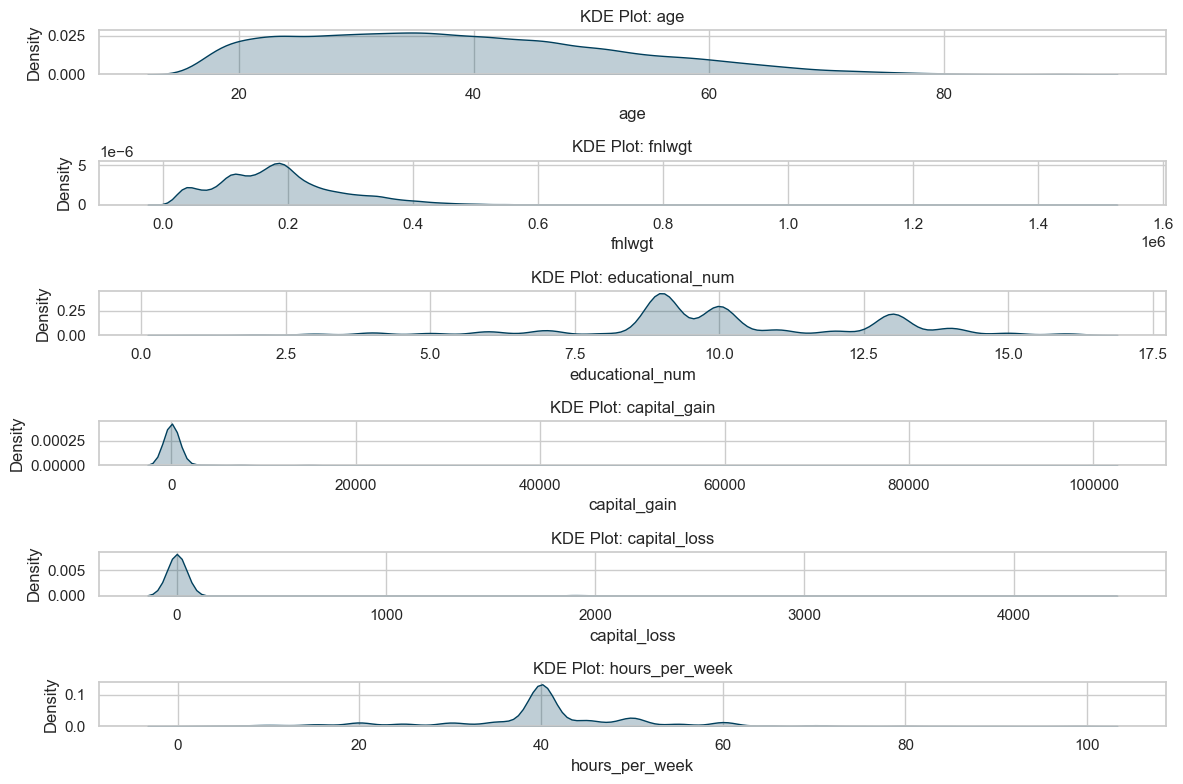

In [2504]:
# Get the list of numeric columns
numeric_cols = numerical_columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through numeric columns and create KDE plots
for i, col in enumerate(numeric_cols):
    # Create a new subplot for each column
    plt.subplot(len(numeric_cols), 1, i + 1)
    
    # Plot the KDE plot for the current column
    sns.kdeplot(df[col], shade=True)
    
    # Set the x-label, y-label, and title for the subplot
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE Plot: {col}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



Log Transform

### Categorical Columns

In [2505]:
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')

#### Unique Values

In [2506]:
for column in categorical_columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts().sort_index()

    print(f"Column: '{column}'")
    print("Unique Values:")
    print(', '.join(map(str, unique_values)))
    print()
    print("Unique Value Counts:")
    for value in unique_values:
        count = value_counts.get(value, 0)
        print(f"  - {value}: {count} occurrences")
    print("--------------")
    print()

Column: 'workclass'
Unique Values:
Private, Local-gov, ?, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked

Unique Value Counts:
  - Private: 33860 occurrences
  - Local-gov: 3136 occurrences
  - ?: 2795 occurrences
  - Self-emp-not-inc: 3861 occurrences
  - Federal-gov: 1432 occurrences
  - State-gov: 1981 occurrences
  - Self-emp-inc: 1694 occurrences
  - Without-pay: 21 occurrences
  - Never-worked: 10 occurrences
--------------

Column: 'education'
Unique Values:
11th, HS-grad, Assoc-acdm, Some-college, 10th, Prof-school, 7th-8th, Bachelors, Masters, Doctorate, 5th-6th, Assoc-voc, 9th, 12th, 1st-4th, Preschool

Unique Value Counts:
  - 11th: 1812 occurrences
  - HS-grad: 15770 occurrences
  - Assoc-acdm: 1601 occurrences
  - Some-college: 10863 occurrences
  - 10th: 1389 occurrences
  - Prof-school: 834 occurrences
  - 7th-8th: 954 occurrences
  - Bachelors: 8013 occurrences
  - Masters: 2656 occurrences
  - Doctorate: 594 occurrences
  - 5th-6th: 5

In [2507]:
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')

#### native_country

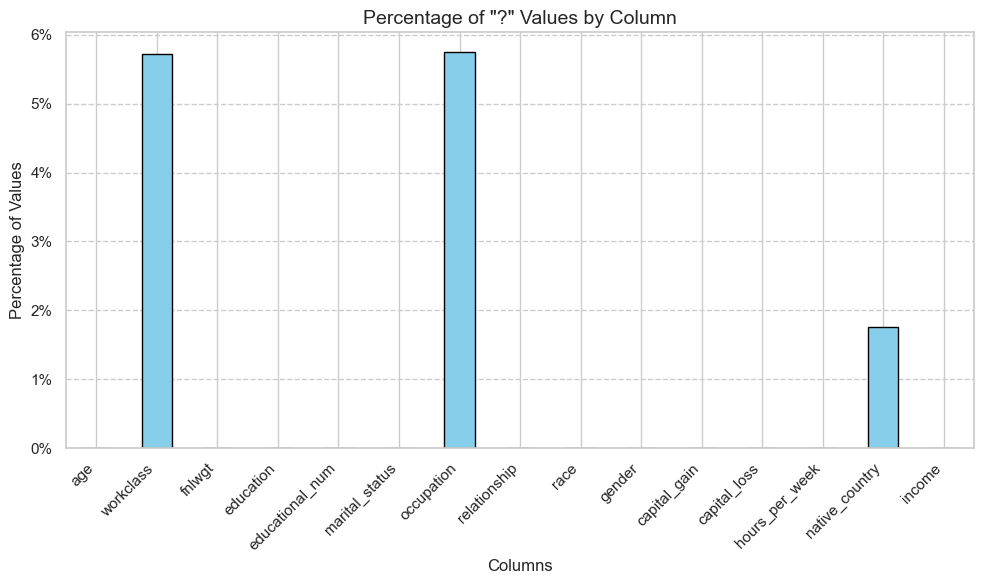

In [2508]:
value_percentages = (df == '?').mean() * 100

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
value_percentages.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Set plot labels and title
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Percentage of Values', fontsize=12)
ax.set_title('Percentage of "?" Values by Column', fontsize=14)

# Set y-axis tick format to percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x / 100)))

# Adjust plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [2509]:
df.shape

(48790, 15)

In [2510]:
value_percentages = (df == '?').mean() * 100

# Filter rows with the specific value
df = df[~(df == '?').any(axis=1)]


In [2511]:
df.shape

(45175, 15)

In [2512]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [2513]:
country_counts = df['native_country'].value_counts()
country_counts

native_country
United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

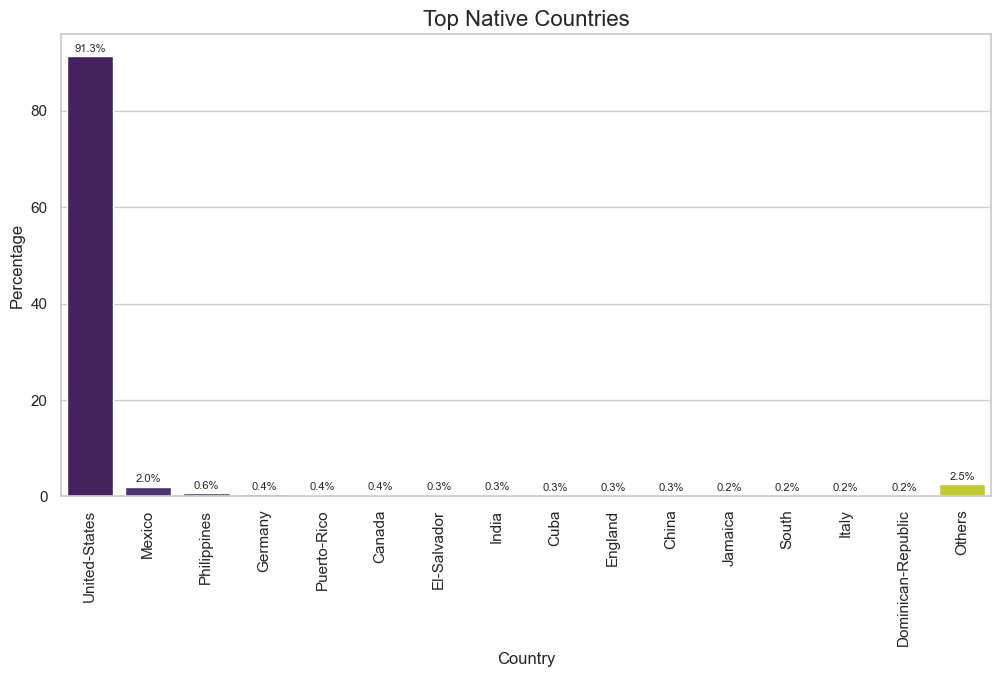

In [2514]:
country_counts = df['native_country'].value_counts(normalize=True) * 100

# Get the top 12 countries and their counts
top_countries = country_counts.head(15)
other_countries_percentage = country_counts[15:].sum()

# Create a new series with the top countries and "Others"
country_counts_top12 = pd.concat([top_countries, pd.Series({'Others': other_countries_percentage})])

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=country_counts_top12.index, y=country_counts_top12.values, palette="viridis")
ax.set_title('Top Native Countries', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Add percentage labels to the bars
for i, v in enumerate(country_counts_top12):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

In [2515]:
top_countries = country_counts.head(5)
top_countries=top_countries.index.unique()
top_countries

Index(['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico'], dtype='object', name='native_country')

A large number of people belong to the USA, followed by Mexico.

Replacing country with less than 0.1% count as ---> Others

In [2516]:
country_counts = df['native_country'].value_counts(normalize=True) * 100

# Get the countries with a count less than 0.1%
countries_to_replace = country_counts[country_counts < 0.1].index

# Replace the countries with 'others'
df['native_country'] = df['native_country'].replace(countries_to_replace, 'others')

#### workclass

In [2517]:
workclass_counts = df['workclass'].value_counts() * 100
workclass_counts

workclass
Private             3326200
Self-emp-not-inc     379500
Local-gov            310000
State-gov            194600
Self-emp-inc         164500
Federal-gov          140600
Without-pay            2100
Name: count, dtype: int64

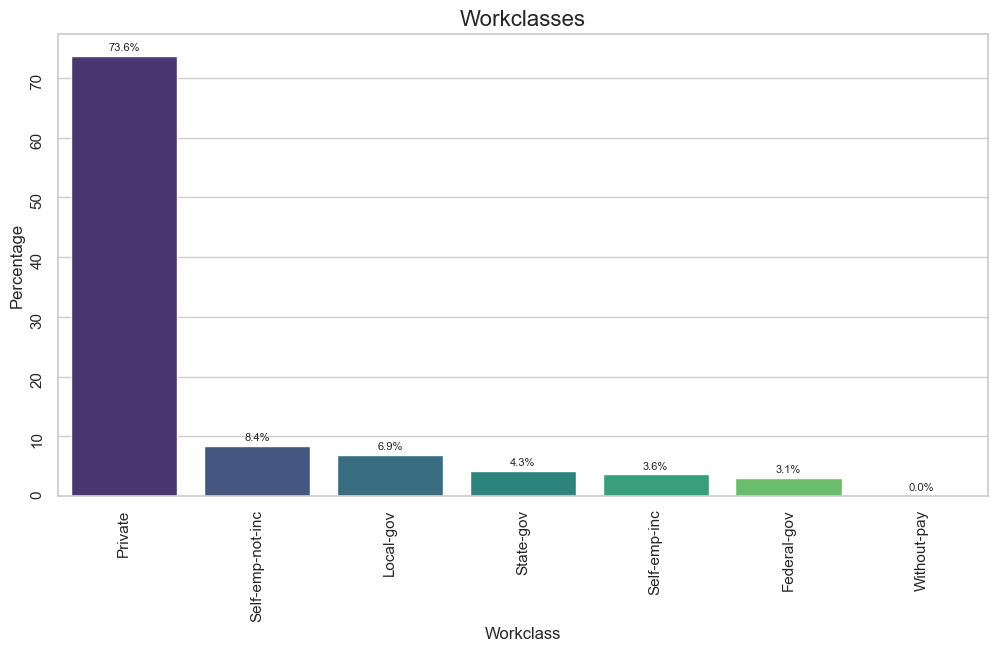

In [2518]:

# Assuming 'df' is your DataFrame and 'workclass' is the column with workclass values
workclass_counts = df['workclass'].value_counts(normalize=True) * 100

# Get the top 12 workclass values and their counts
top_workclasses = workclass_counts

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_workclasses.index, y=top_workclasses.values, palette="viridis")
ax.set_title('Workclasses', fontsize=16)
ax.set_xlabel('Workclass', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(labelrotation=90)

# Add percentage labels to the bars
for i, v in enumerate(top_workclasses):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()


Most of the working class belongs to the private sector, followed by the following categories:

1. Self-employed individuals
2. Local government employees
3. State government employees
4. Self-employed workers
5. Federal government employees


The number of people working without pay is minuscule.

In [2519]:
unique_countries = top_countries.unique()
unique_countries

Index(['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico'], dtype='object', name='native_country')

In [2520]:
top_countries

Index(['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico'], dtype='object', name='native_country')

Native_country and workclass

<Figure size 2000x2000 with 0 Axes>

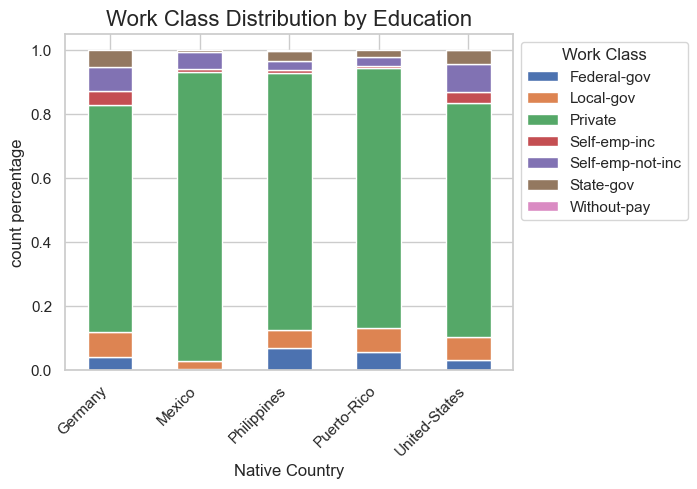

In [2521]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
grouped_data = df.groupby(['workclass','native_country']).size().reset_index(name='count')
# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100



# Filter the grouped_data DataFrame based on the included countries
filtered_data = grouped_data[grouped_data['native_country'].isin(top_countries)]

# Pivot the filtered data to get the count of each workclass and education combination
pivot_df = filtered_data.pivot(index='native_country', columns='workclass', values='count_percentage')

# Normalize the data
normalized_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Set the figure size
plt.figure(figsize=(20, 20))

# Plot the stacked bar chart
normalized_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Work Class Distribution by Education', fontsize=16)
plt.xlabel('Native Country', fontsize=12)
plt.ylabel('count percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


Most of the work classes in the top 5 countries are employed in the private sector.

1. In the United States, Mexico, and other countries, private individuals are the largest group. 
2. However, in Germany and the Philippines, the federal government is the second largest group. 
3. In Germany, people working in the local government are the second largest group.

#### education

In [2522]:
education_counts = df['education'].value_counts(normalize=True) * 100
education_counts

education
HS-grad         32.695075
Some-college    21.885999
Bachelors       16.732706
Masters          5.562811
Assoc-voc        4.334256
11th             3.583841
Assoc-acdm       3.335916
10th             2.707250
7th-8th          1.819590
Prof-school      1.737687
9th              1.496403
12th             1.272828
Doctorate        1.204206
5th-6th          0.989485
1st-4th          0.486995
Preschool        0.154953
Name: proportion, dtype: float64

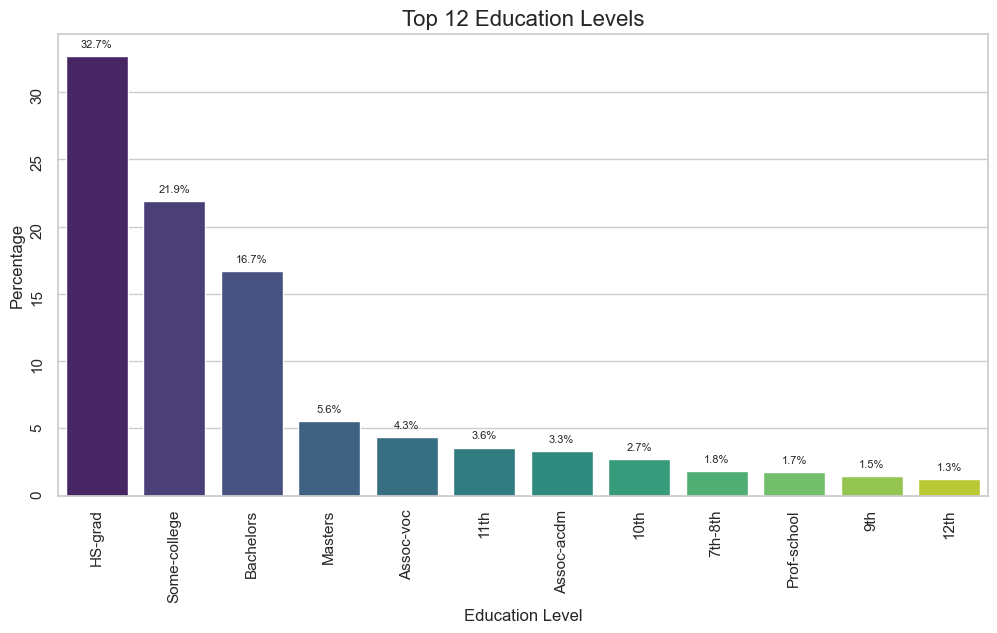

In [2523]:
education_counts = df['education'].value_counts(normalize=True) * 100

# Get the top 12 education levels and their counts
top_education_levels = education_counts.head(12)

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_education_levels.index, y=top_education_levels.values, palette="viridis")
ax.set_title('Top 12 Education Levels', fontsize=16)
ax.set_xlabel('Education Level', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(labelrotation=90)

# Add percentage labels to the bars
for i, v in enumerate(top_education_levels):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

In [2524]:
top_education_levels = education_counts.head(8)
top_education_levels=top_education_levels.index
top_education_levels

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th'],
      dtype='object', name='education')

Analysisng Education of the private class 

In [2525]:
top_countries

Index(['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico'], dtype='object', name='native_country')

In [2526]:
import plotly.graph_objects as go
import pandas as pd

Workclass and education

<Figure size 2000x2000 with 0 Axes>

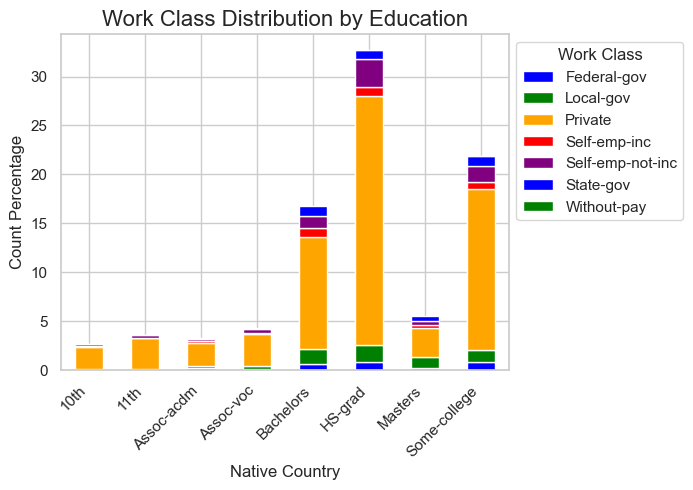

In [2527]:

grouped_data = df.groupby(['workclass','education']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

filtered_data = grouped_data[grouped_data['education'].isin(top_education_levels)]

pivot_df = filtered_data.pivot(index='education', columns='workclass', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True, color=colors)

# Set the title, x-axis label, and y-axis label
plt.title('Work Class Distribution by Education', fontsize=16)
plt.xlabel('Native Country', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

1. Most of the workclass is from HS-grads followed by Some ollege and bachelors
2. Populace are working in Private class from alll education backgorund

In [2528]:
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')

In [2529]:
top_education_levels

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th'],
      dtype='object', name='education')

Education and Native_country

#### marital_status

In [2530]:
marital_status_counts = df['marital_status'].value_counts(normalize=True) * 100
marital_status_counts

marital_status
Married-civ-spouse       46.578860
Never-married            32.245711
Divorced                 13.932485
Separated                 3.123409
Widowed                   2.826785
Married-spouse-absent     1.221915
Married-AF-spouse         0.070836
Name: proportion, dtype: float64

Replacing Seperated with Divorced

In [2531]:
# Replace "sperated" with "divorced" in the "marital_status" column
df['marital_status'] = df['marital_status'].replace('Separated', 'Divorced')


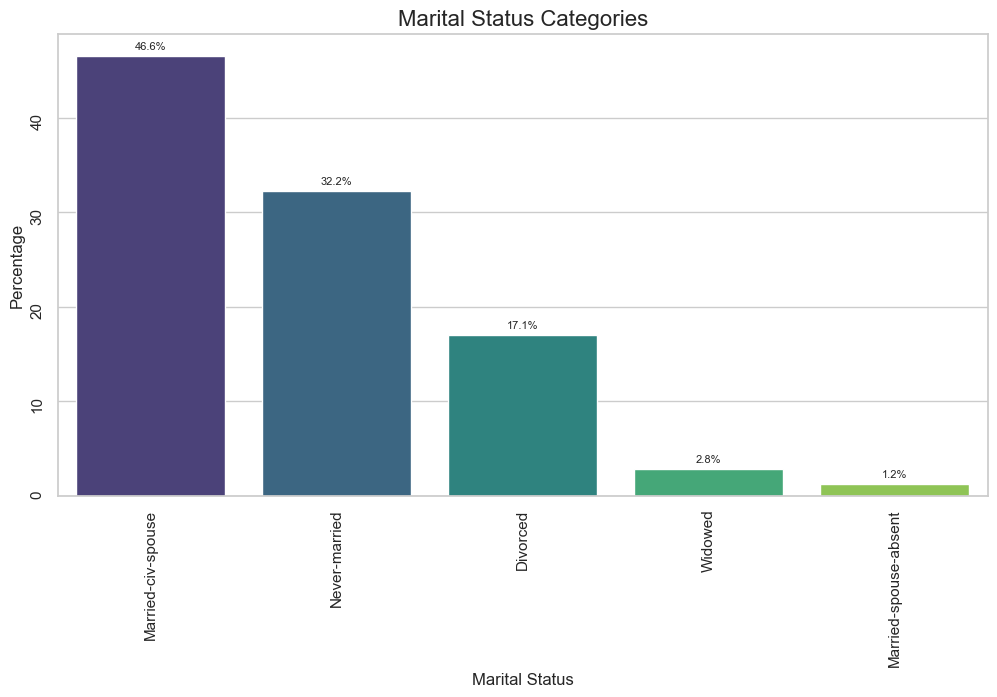

In [2532]:
marital_status_counts = df['marital_status'].value_counts(normalize=True) * 100

# Get the top 12 marital status categories and their percentages
top_marital_status = marital_status_counts.head()

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_marital_status.index, y=top_marital_status.values, palette="viridis")
ax.set_title('Marital Status Categories', fontsize=16)
ax.set_xlabel('Marital Status', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(labelrotation=90)

# Add percentage labels to the bars
for i, v in enumerate(top_marital_status):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

Marital status and Education


<Figure size 2000x2000 with 0 Axes>

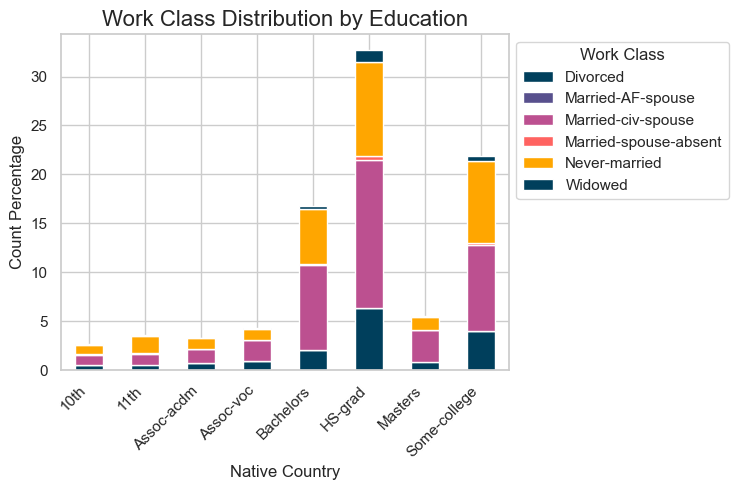

In [2533]:


grouped_data = df.groupby(['marital_status', 'education']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

filtered_data = grouped_data[grouped_data['education'].isin(top_education_levels)]

pivot_df = filtered_data.pivot(index='education', columns='marital_status', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Work Class Distribution by Education', fontsize=16)
plt.xlabel('Native Country', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


Marital and  native_country

<Figure size 2000x2000 with 0 Axes>

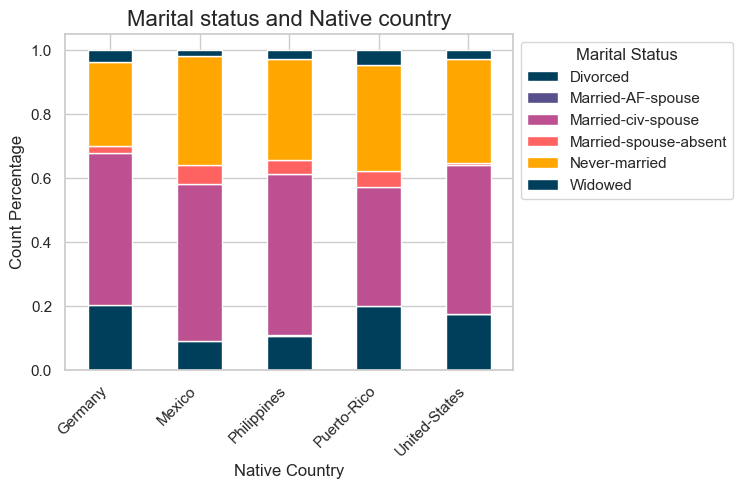

In [2534]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
grouped_data = df.groupby(['marital_status','native_country']).size().reset_index(name='count')
# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100



# Filter the grouped_data DataFrame based on the included countries
filtered_data = grouped_data[grouped_data['native_country'].isin(top_countries)]

# Pivot the filtered data to get the count of each workclass and education combination
pivot_df = filtered_data.pivot(index='native_country', columns='marital_status', values='count_percentage')

# Normalize the data
normalized_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Set the color palette
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(20, 20))

# Plot the stacked bar chart
ax = normalized_df.plot(kind='bar', stacked=True)


# Set the title, x-axis label, and y-axis label
plt.title('Marital status and Native country', fontsize=16)
plt.xlabel('Native Country', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Marital Status', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


1. Population in most countries is Married with civilian spouse 
2. Followed by population whcih is Not married
3. Work force has noticable divorced population 

Marital and workclass

<Figure size 2000x2000 with 0 Axes>

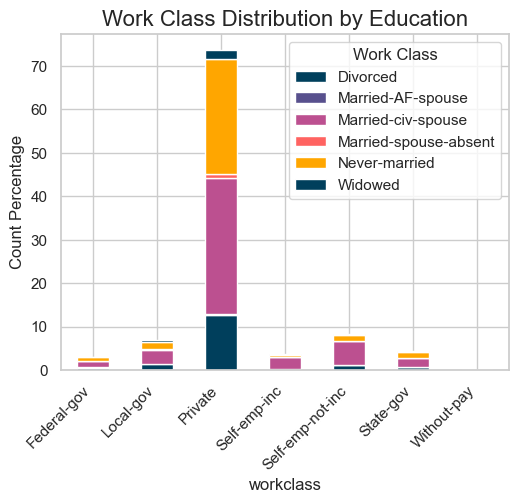

In [2535]:


grouped_data = df.groupby(['marital_status', 'workclass']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100



pivot_df = grouped_data.pivot(index='workclass', columns='marital_status', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Work Class Distribution by Education', fontsize=16)
plt.xlabel('workclass', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


1. As major chunk of worck class comes from private class and most of it is either never maried or is Maried and has civilian spouse in Armed Force while significant Divorced candidtes can also be seen in the private workforce
2. Workclass in other sectors has coniderable population of married civilian people 

#### occupation

In [2536]:
occupation_counts = df['occupation'].value_counts(normalize=True) * 100
occupation_counts


occupation
Craft-repair         13.303818
Prof-specialty       13.283896
Exec-managerial      13.237410
Adm-clerical         12.252352
Sales                11.964582
Other-service        10.636414
Machine-op-inspct     6.563365
Transport-moving      5.126729
Handlers-cleaners     4.526840
Farming-fishing       3.265080
Tech-support          3.141118
Protective-serv       2.158273
Priv-house-serv       0.509131
Armed-Forces          0.030991
Name: proportion, dtype: float64

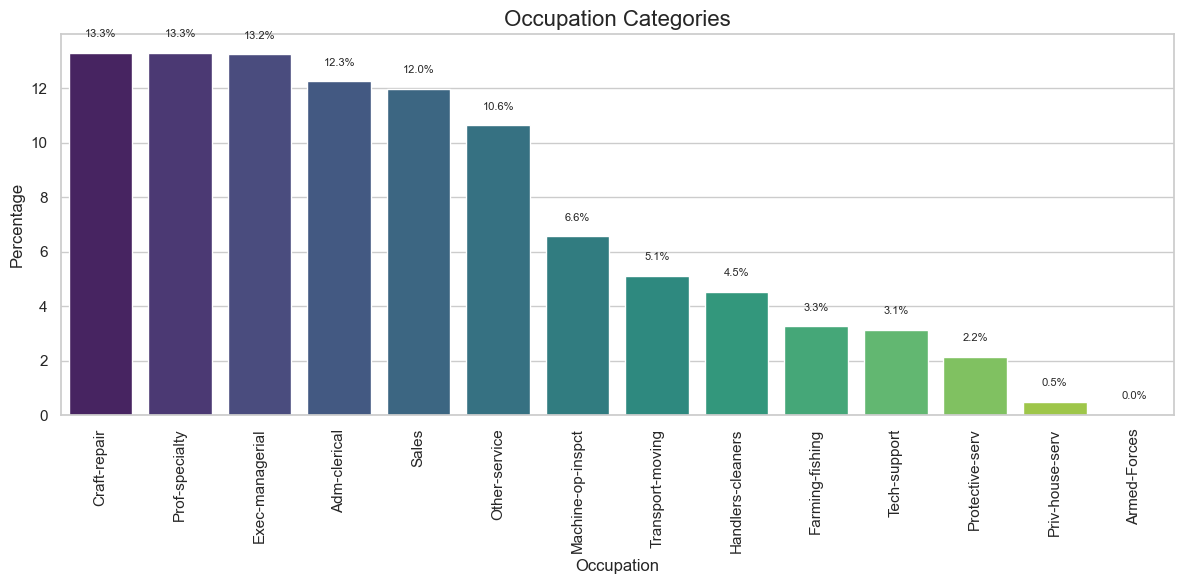

In [2537]:
occupation_counts = df['occupation'].value_counts(normalize=True) * 100

# Get the top occupation categories and their percentages
top_occupations = occupation_counts

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_occupations.index, y=top_occupations.values, palette="viridis")
ax.set_title('Occupation Categories', fontsize=16)
ax.set_xlabel('Occupation', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Add percentage labels to the bars
for i, v in enumerate(top_occupations):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

# Center the plot horizontally and vertically
plt.tight_layout()

plt.show()

Workclass and occupation

<Figure size 2000x2000 with 0 Axes>

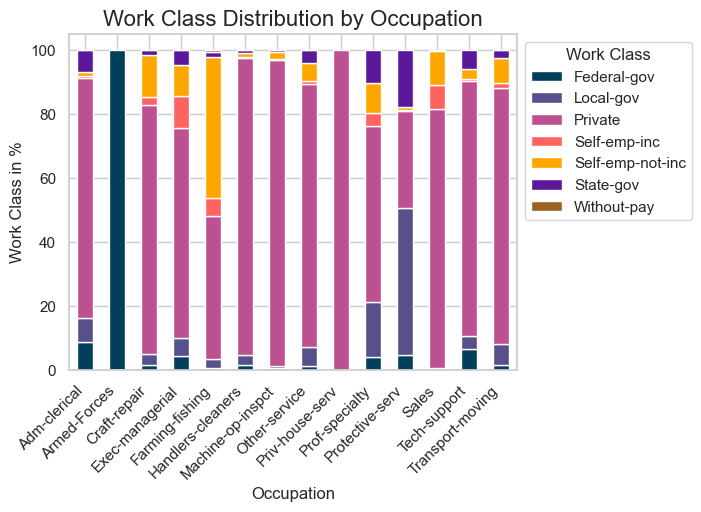

In [2538]:


grouped_data = df.groupby(['occupation', 'workclass']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data.groupby('occupation')['count'].transform('sum')) * 100

pivot_df = grouped_data.pivot(index='occupation', columns='workclass', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#5a189a', '#9a6324', '#ff7f00']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Work Class Distribution by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Work Class in %', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


1. Armed forces are 100% employed in Federal_gov
2. In all occupation workclass from private is dominating 
3. In Farming-Fishing occupation  self employed and private are prevelant 
4. Protective Services has populace from State-gov

#### relationship

In [2539]:
relationship_counts = df['relationship'].value_counts(normalize=True) * 100
relationship_counts

relationship
Husband           41.290537
Not-in-family     25.852795
Own-child         14.645268
Unmarried         10.596569
Wife               4.628666
Other-relative     2.986165
Name: proportion, dtype: float64

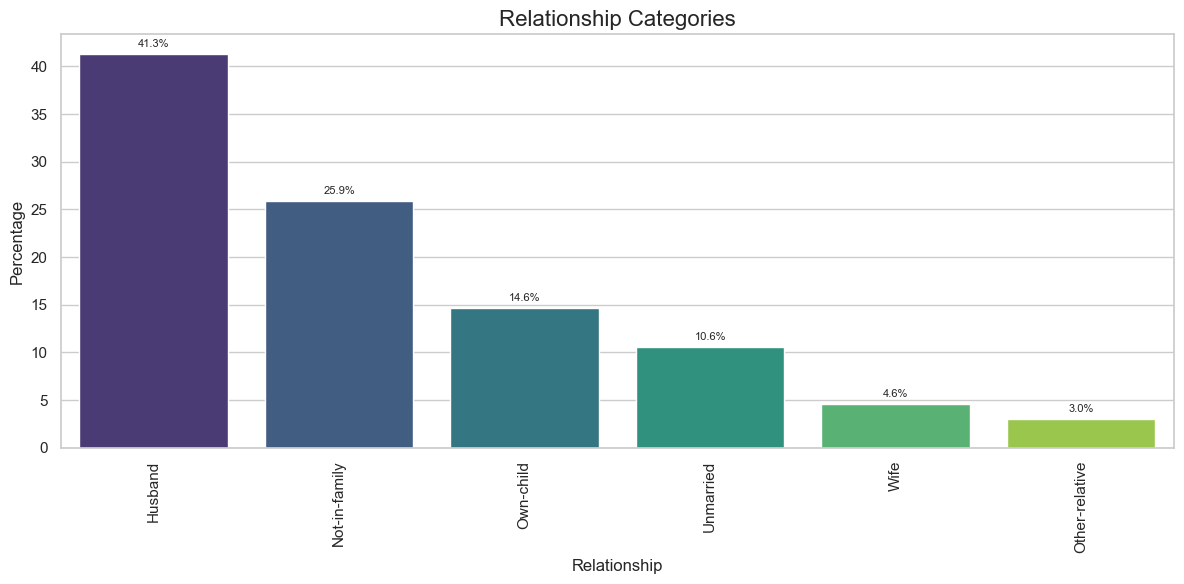

In [2540]:
relationship_counts = df['relationship'].value_counts(normalize=True) * 100

# Get the top relationship categories and their percentages
top_relationships = relationship_counts

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_relationships.index, y=top_relationships.values, palette="viridis")
ax.set_title('Relationship Categories', fontsize=16)
ax.set_xlabel('Relationship', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Add percentage labels to the bars
for i, v in enumerate(top_relationships):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

# Center the plot horizontally and vertically
plt.tight_layout()

plt.show()

Work force and relationship

<Figure size 2000x2000 with 0 Axes>

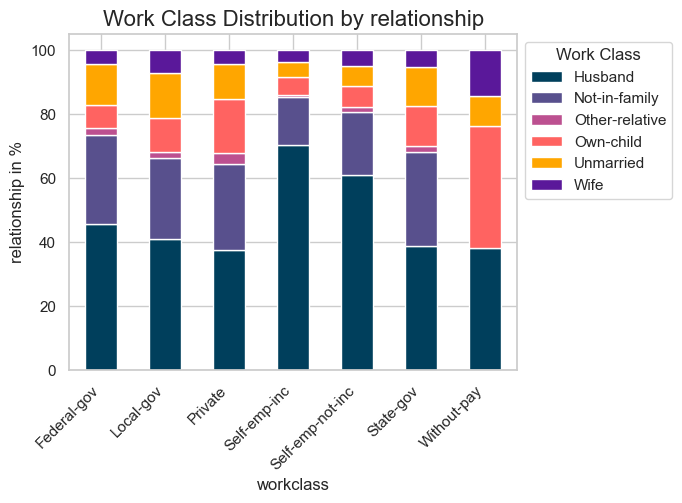

In [2541]:


grouped_data = df.groupby(['workclass', 'relationship']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data.groupby('workclass')['count'].transform('sum')) * 100

pivot_df = grouped_data.pivot(index='workclass', columns='relationship', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#5a189a', '#9a6324', '#ff7f00']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Work Class Distribution by relationship', fontsize=16)
plt.xlabel('workclass', fontsize=12)
plt.ylabel('relationship in %', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


#### race

In [2542]:
race_counts = df['race'].value_counts(normalize=True) * 100
race_counts

race
White                 86.018816
Black                  9.356945
Asian-Pac-Islander     2.879911
Amer-Indian-Eskimo     0.962922
Other                  0.781406
Name: proportion, dtype: float64

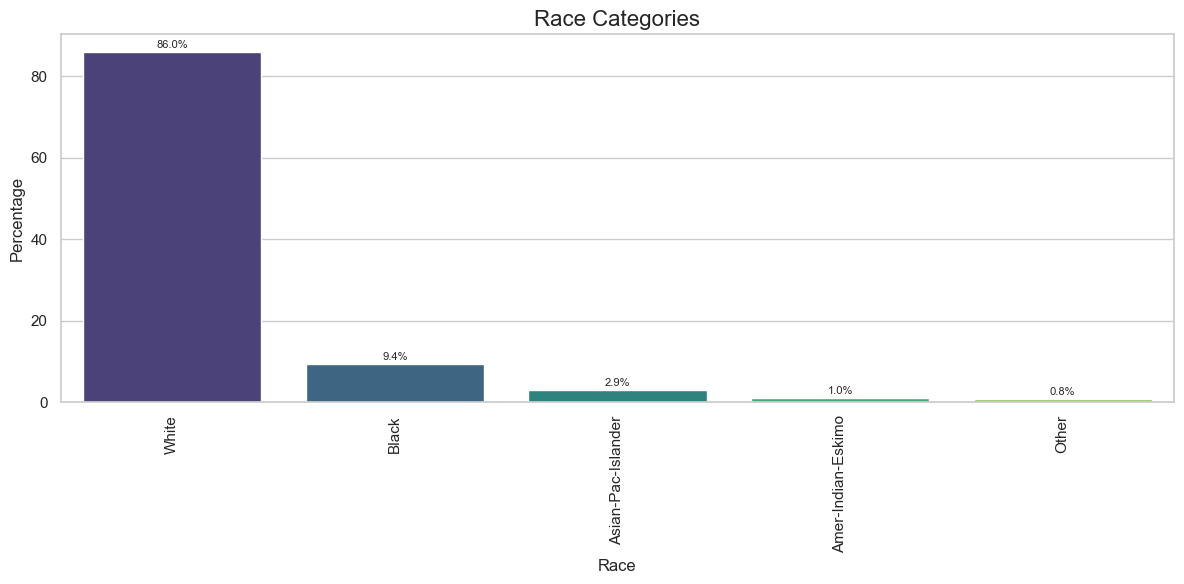

In [2543]:
race_counts = df['race'].value_counts(normalize=True) * 100

# Get the top race categories and their percentages
top_races = race_counts

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_races.index, y=top_races.values, palette="viridis")
ax.set_title('Race Categories', fontsize=16)
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Add percentage labels to the bars
for i, v in enumerate(top_races):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

# Center the plot horizontally and vertically
plt.tight_layout()

plt.show()

native_country and Race

<Figure size 2000x2000 with 0 Axes>

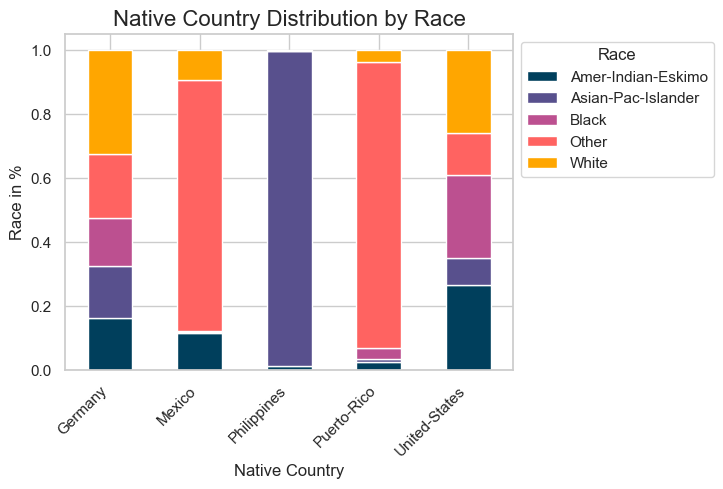

In [2544]:
grouped_data = df.groupby(['native_country', 'race']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data.groupby('race')['count'].transform('sum')) * 100

filtered_data = grouped_data[grouped_data['native_country'].isin(top_countries)]

pivot_df = filtered_data.pivot(index='native_country', columns='race', values='count_percentage')

# Normalize the data
normalized_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#5a189a', '#9a6324', '#ff7f00']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
normalized_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Native Country Distribution by Race', fontsize=16)
plt.xlabel('Native Country', fontsize=12)
plt.ylabel('Race in %', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Race', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

1. Asian-Pac_islander majorly in high percentages from phillipnies
2. Other race populace are in high percentges for people native from Maxico

In [2545]:
top_countries


Index(['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico'], dtype='object', name='native_country')

In [2546]:
top_countries=['Mexico', 'Philippines', 'Germany', 'Puerto-Rico']

Race and workclass

<Figure size 2000x2000 with 0 Axes>

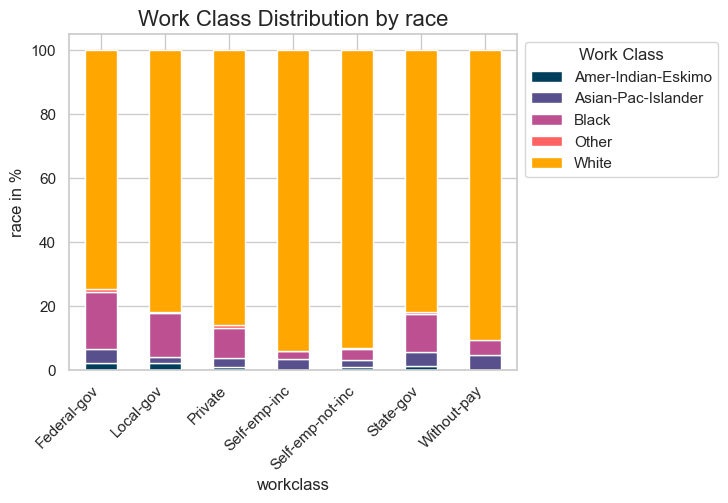

In [2547]:
grouped_data = df.groupby(['workclass', 'race']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data.groupby('workclass')['count'].transform('sum')) * 100

pivot_df = grouped_data.pivot(index='workclass', columns='race', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#5a189a', '#9a6324', '#ff7f00']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Work Class Distribution by race', fontsize=16)
plt.xlabel('workclass', fontsize=12)
plt.ylabel('race in %', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

1. Race-White , is seen significant proportions(percentages) accross sectors
2. Populace from black community are noted to be second in numbers

#### gender

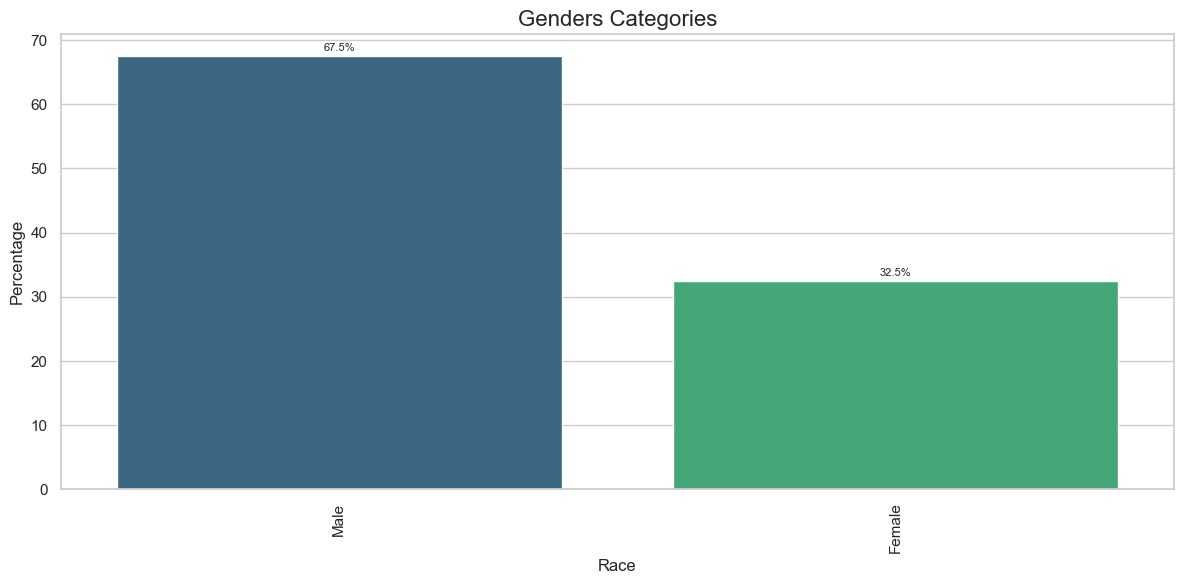

In [2548]:
race_counts = df['gender'].value_counts(normalize=True) * 100

# Get the top race categories and their percentages
top_races = race_counts

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_races.index, y=top_races.values, palette="viridis")
ax.set_title('Genders Categories', fontsize=16)
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Add percentage labels to the bars
for i, v in enumerate(top_races):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

# Center the plot horizontally and vertically
plt.tight_layout()

plt.show()

Gender and Workclass 

<Figure size 2000x2000 with 0 Axes>

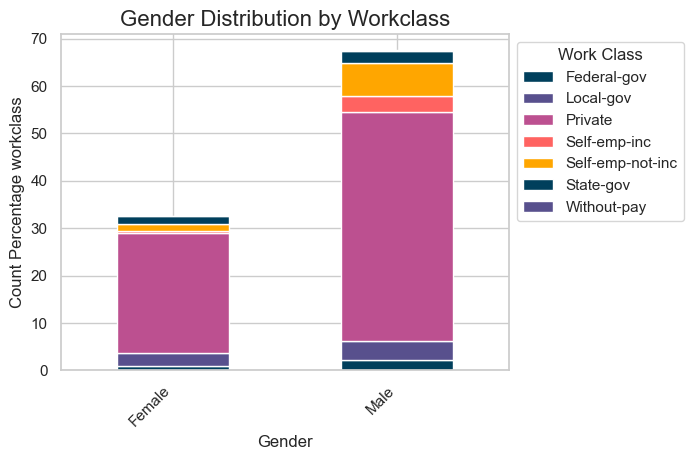

In [2549]:
grouped_data = df.groupby(['gender', 'workclass']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100



pivot_df = grouped_data.pivot(index='gender', columns='workclass', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Gender Distribution by Workclass', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count Percentage workclass', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


1. Male are approx 70 % in the workforce
2. Male and female are significant in numbers in  private sector

Gender and occupation

<Figure size 2000x2000 with 0 Axes>

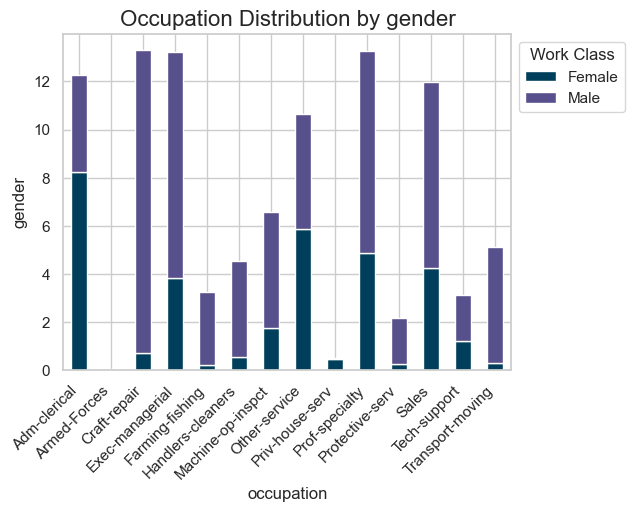

In [2550]:
grouped_data = df.groupby(['occupation', 'gender']).size().reset_index(name='count')
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100



pivot_df = grouped_data.pivot(index='occupation', columns='gender', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the work classes
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Occupation Distribution by gender', fontsize=16)
plt.xlabel('occupation', fontsize=12)
plt.ylabel('gender', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Work Class', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()


1. Adm_Clerical occupation has more female workclass as compared to male
2. craft-Repair has high number of male population
3. Prof-Speciality has has Male and Female in almost equal proportions 
4. Priv-House-Service has only Female populace 
5. Transport moving has least Female in proportions

#### income

In [2551]:
income_counts = df['income'].value_counts(normalize=True) * 100
income_counts

income
<=50K    75.203099
>50K     24.796901
Name: proportion, dtype: float64

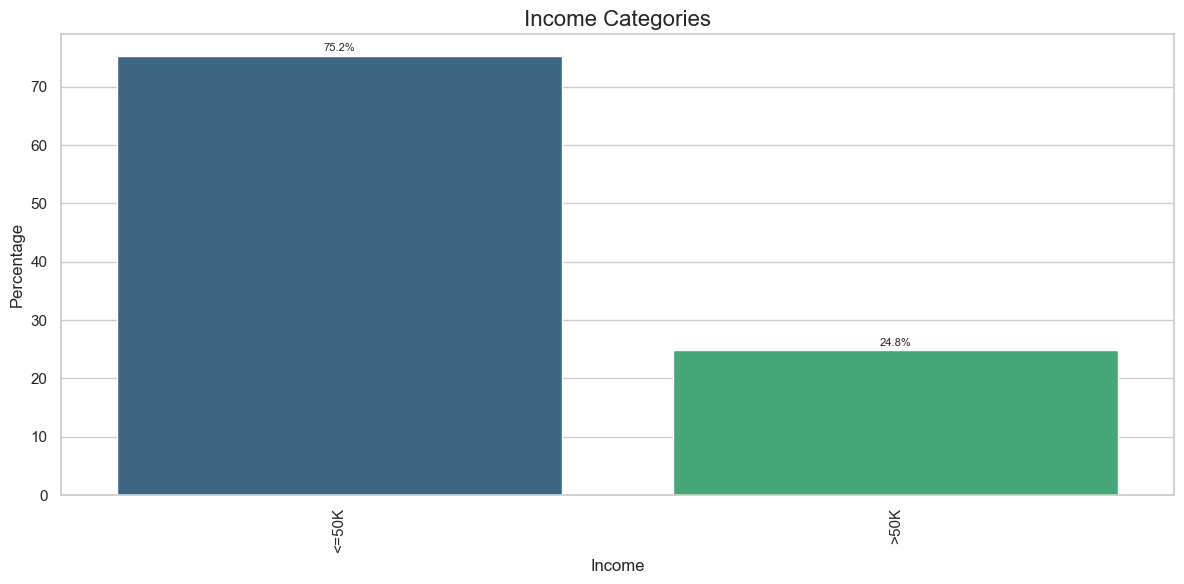

In [2552]:
income_counts = df['income'].value_counts(normalize=True) * 100

# Get the top income categories and their percentages
top_incomes = income_counts

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the bar plot with percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_incomes.index, y=top_incomes.values, palette="viridis")
ax.set_title('Income Categories', fontsize=16)
ax.set_xlabel('Income', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Add percentage labels to the bars
for i, v in enumerate(top_incomes):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

# Center the plot horizontally and vertically
plt.tight_layout()

plt.show()

In [2553]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Income and Occupation


<Figure size 2000x2000 with 0 Axes>

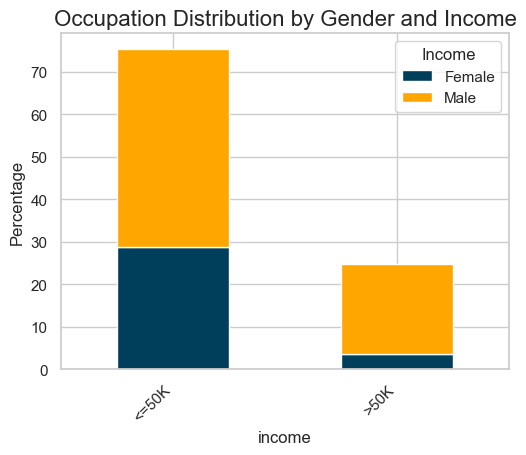

In [2554]:
# Group data by 'occupation', 'gender', and 'income'
grouped_data = df.groupby(['gender', 'income']).size().reset_index(name='count')

# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

# Pivot the data
pivot_df = grouped_data.pivot(index='income', columns='gender', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the income groups
colors = ['#003f5c','#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Occupation Distribution by Gender and Income', fontsize=16)
plt.xlabel('income', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Income', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

Income and education

<Figure size 2000x2000 with 0 Axes>

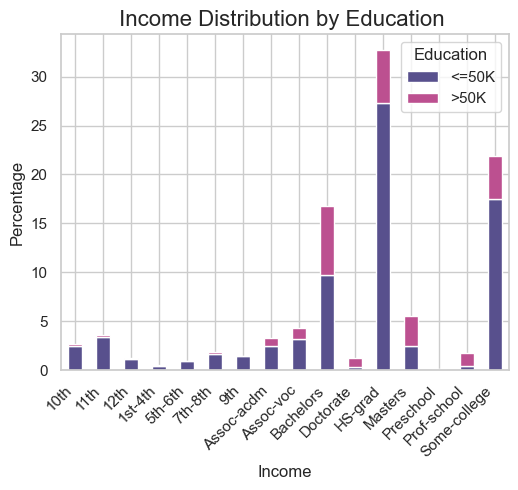

In [2573]:
# Group data by 'income', 'education', and 'age'
grouped_data = df.groupby(['income', 'education']).size().reset_index(name='count')

# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

# Pivot the data
pivot_df = grouped_data.pivot(index='education', columns='income', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the education groups
colors = [ '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Income Distribution by Education ', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the legend title
plt.legend(title='Education', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

income and age

#### Categorical and Numerical

Target Column

Converting age column to categorical

In [2556]:
df['age']

0        25
1        38
2        28
3        44
5        34
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 45175, dtype: int64

In [2557]:

# Create age bins and corresponding labels
age_bins = [0, 18, 35, 50, 65, 100]  # Define your age groups/bins
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']  # Define labels for each age group

# Create a new column 'age_category' based on the age bins
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


In [2558]:
df['age_category'].unique()

['19-35', '36-50', '51-65', '65+', '0-18']
Categories (5, object): ['0-18' < '19-35' < '36-50' < '51-65' < '65+']

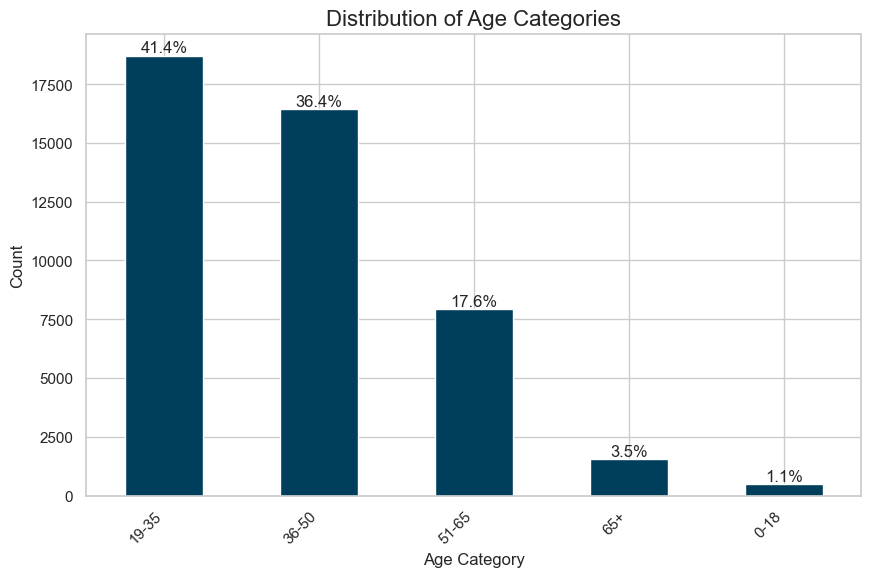

In [2559]:
# Count the occurrences of each age category
age_counts = df['age_category'].value_counts()

# Calculate the percentage of each age category
age_percentages = (age_counts / age_counts.sum()) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the colors for the bar plot
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the bar plot
ax = age_counts.plot(kind='bar')

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of Age Categories', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels to the bars
for p in ax.patches:
    percentage = f'{p.get_height() / age_counts.sum() * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Display the plot
plt.show()

Age and Income

<Figure size 2000x2000 with 0 Axes>

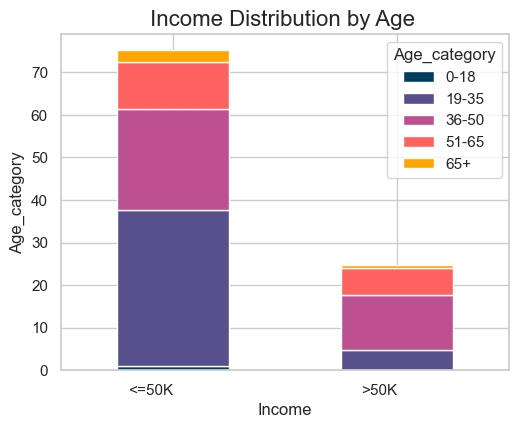

In [2560]:
# Group data by 'income', 'education', and 'age'
grouped_data = df.groupby(['income', 'age_category']).size().reset_index(name='count')

# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

# Pivot the data
pivot_df = grouped_data.pivot(index='income', columns='age_category', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the education groups
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Income Distribution by Age ', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Age_category', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Set the legend title
plt.legend(title='Age_category', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

1. Middle Aged people 36-50 are high in number earning >50K followed by 51-65
2. Young people 19-35 have major share among the people earning <=50K followed by Middle aged (36-50) 
3. People earning <=50K are more in proportions 70% approx

Age and workclass

<Figure size 2000x2000 with 0 Axes>

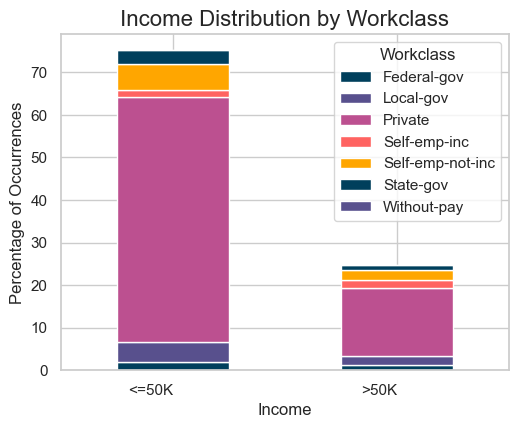

In [2561]:
# Group data by 'income', 'workclass'
grouped_data = df.groupby(['income', 'workclass']).size().reset_index(name='count')

# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

# Pivot the data
pivot_df = grouped_data.pivot(index='income', columns='workclass', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the workclass groups
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Income Distribution by Workclass', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Percentage of Occurrences', fontsize=12)  # Change the y-axis label to 'Percentage of Occurrences'

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Set the legend title
plt.legend(title='Workclass', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

Age and occupation

<Figure size 2000x2000 with 0 Axes>

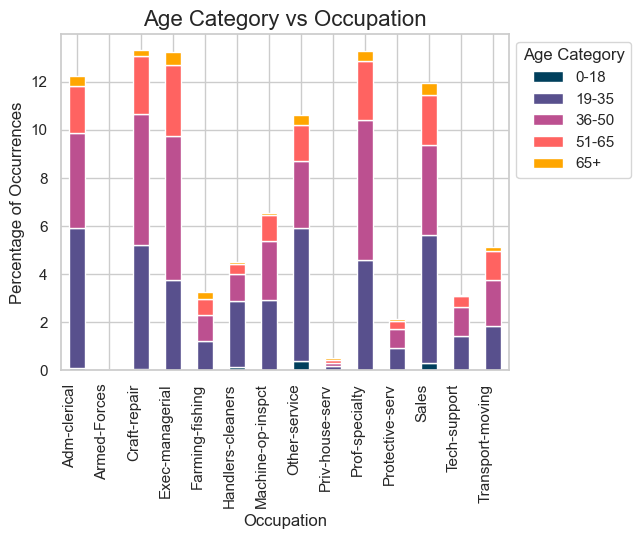

In [2562]:
# Group data by 'age_category', 'occupation'
grouped_data = df.groupby(['age_category', 'occupation']).size().reset_index(name='count')

# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

# Pivot the data
pivot_df = grouped_data.pivot(index='occupation', columns='age_category', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the age categories
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Age Category vs Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Percentage of Occurrences', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Set the legend title
plt.legend(title='Age Category', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

1. 0-18 age group is least in proportion among all segment
2. Armed forces age data is not available


Hours per week and Income

Converting hours per week into categorical column

In [2563]:
# Define the bin edges and labels for the categories
bin_edges = [0, 20, 40, 60, 80, float('inf')]
bin_labels = ['0-20', '21-40', '41-60', '61-80', '80+']

# Convert 'hours_per_week' column into categorical
df['hours_per_week_category'] = pd.cut(df['hours_per_week'], bins=bin_edges, labels=bin_labels, right=False)



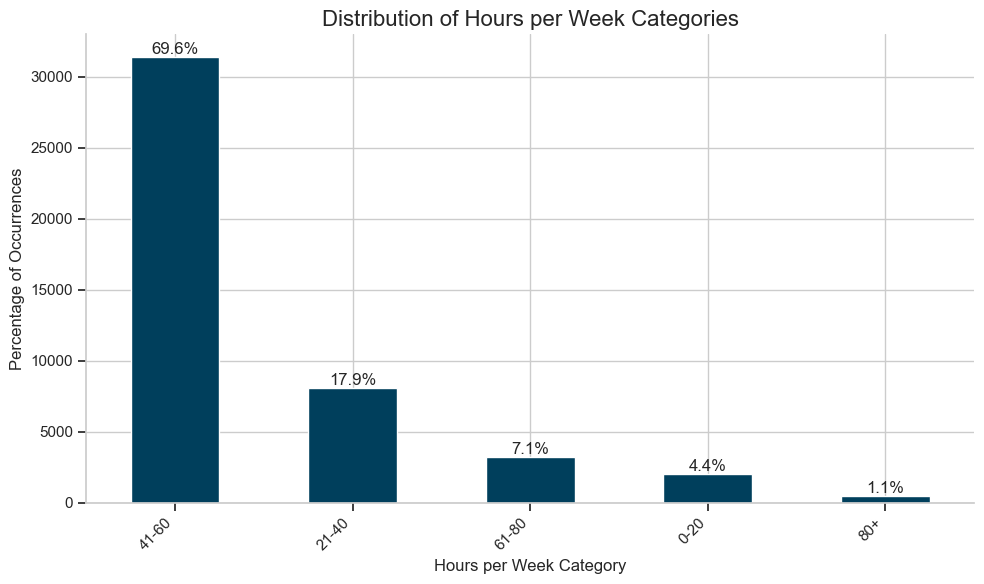

In [2564]:
# Count the occurrences of each age category
age_counts = df['hours_per_week_category'].value_counts()

# Calculate the percentage of each age category
age_percentages = (age_counts / age_counts.sum()) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the colors for the bar plot
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the bar plot
ax = age_counts.plot(kind='bar')

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of Hours per Week Categories', fontsize=16)
plt.xlabel('Hours per Week Category', fontsize=12)
plt.ylabel('Percentage of Occurrences', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels to the bars
for p in ax.patches:
    percentage = f'{p.get_height() / age_counts.sum() * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Beautify the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

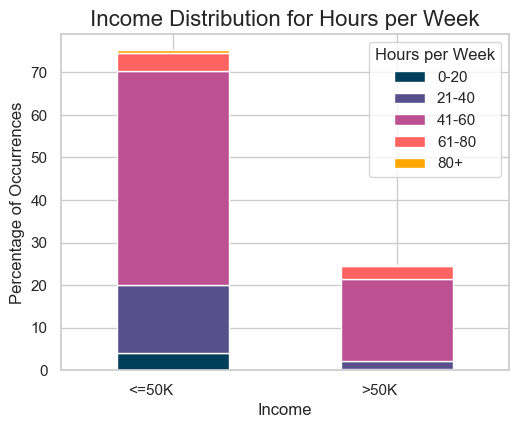

In [2565]:
# Convert 'hours_per_week' column into categorical
df['hours_per_week_category'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 80, float('inf')], labels=['0-20', '21-40', '41-60', '61-80', '80+'], right=False)

# Group data by 'income', 'workclass', and 'hours_per_week_category'
grouped_data = df.groupby(['income', 'hours_per_week_category']).size().reset_index(name='count')

# Calculate count percentage
grouped_data['count_percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

# Pivot the data
pivot_df = grouped_data.pivot(index='income', columns='hours_per_week_category', values='count_percentage')

# Set the figure size
plt.figure(figsize=(20, 20))

# Define the colors for the hours_per_week categories
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot the stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
plt.title('Income Distribution for Hours per Week', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Percentage of Occurrences', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Set the legend title
plt.legend(title='Hours per Week', bbox_to_anchor=(1.0, 1.0))

# Adjust the padding
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.8)

# Display the plot
plt.show()

In [2566]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'age_category', 'hours_per_week_category'],
      dtype='object')

In [2567]:
df.drop(['hours_per_week_category','age_category'],axis=1,inplace=True)

### Outliers

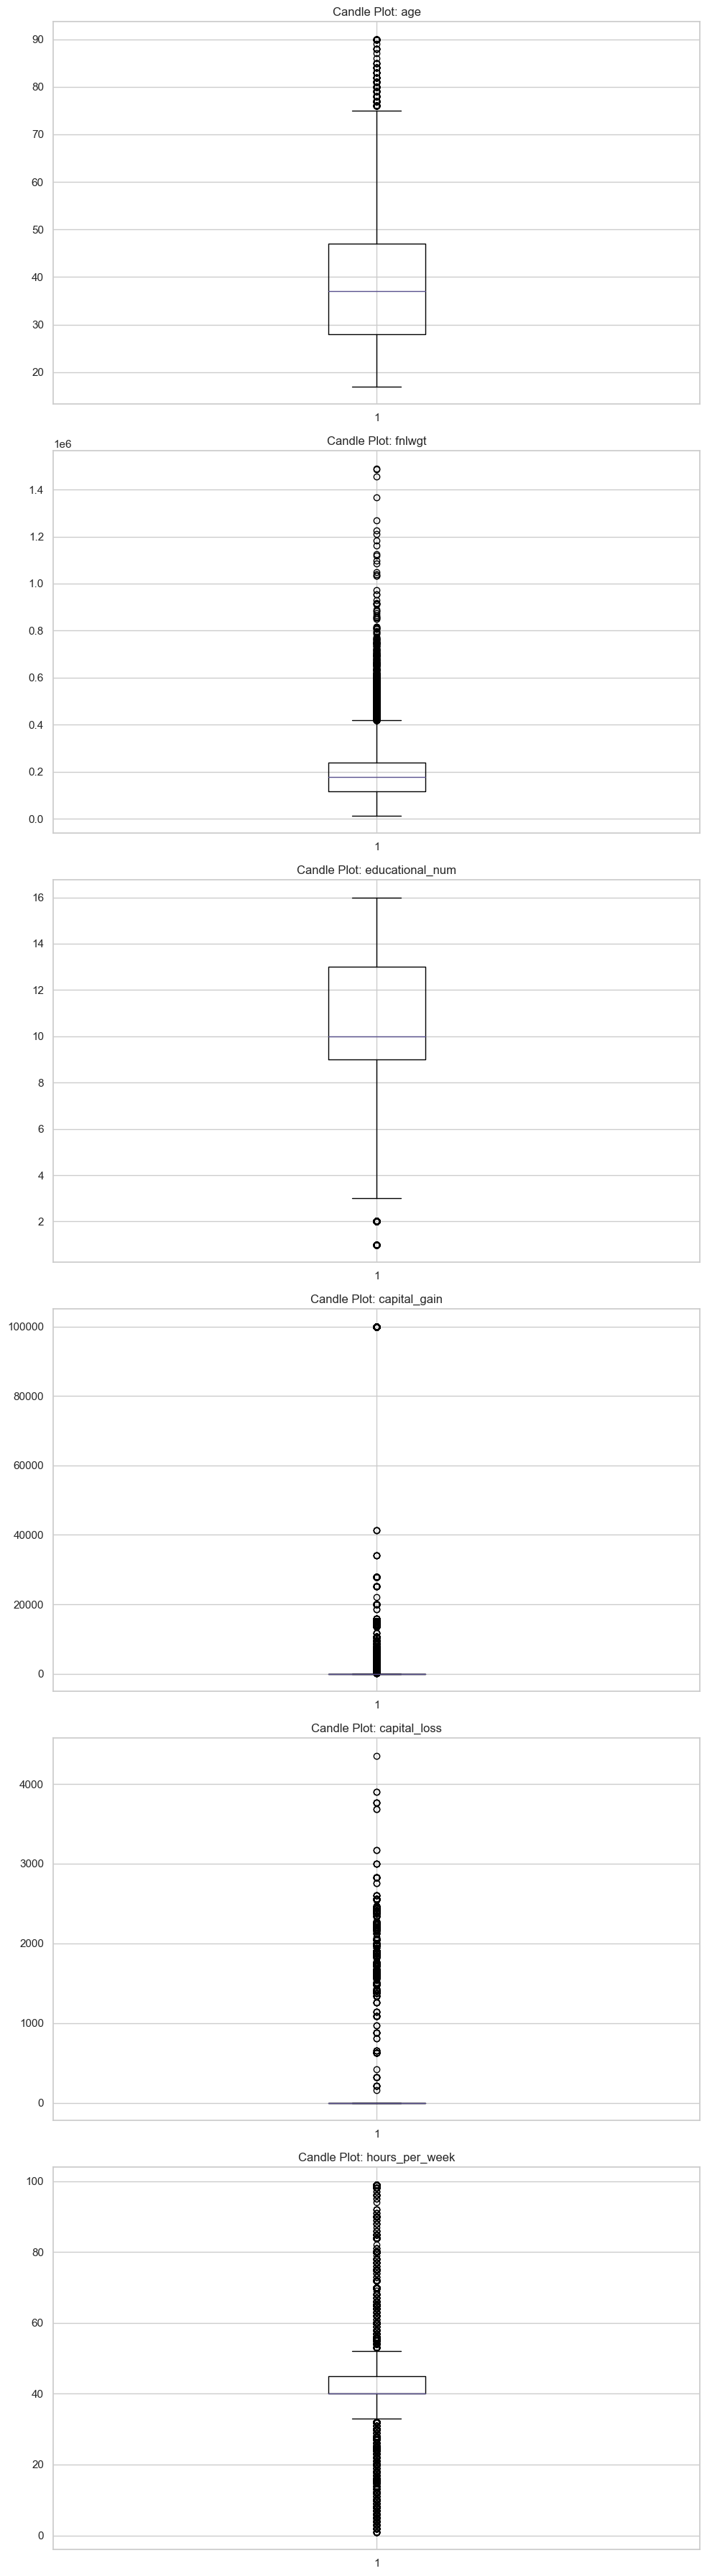

In [2362]:
def plot_data(data,numeric_cols):
    # Get the list of numeric columns
    numeric_cols = numeric_cols
    
    # Create a figure with subplots
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, len(numeric_cols) * 6))
    
    # Loop through numeric columns
    for i, col in enumerate(numeric_cols):
        # Create a candle plot
        axes[i].boxplot(data[col])
        axes[i].set_title(f'Candle Plot: {col}')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()


# Plot the data with candle plots in one page
plot_data(df,numeric_cols)

In [2363]:
numeric_cols

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [2364]:
numeric_cols=['age', 'fnlwgt', 'educational_num',
       'hours_per_week']

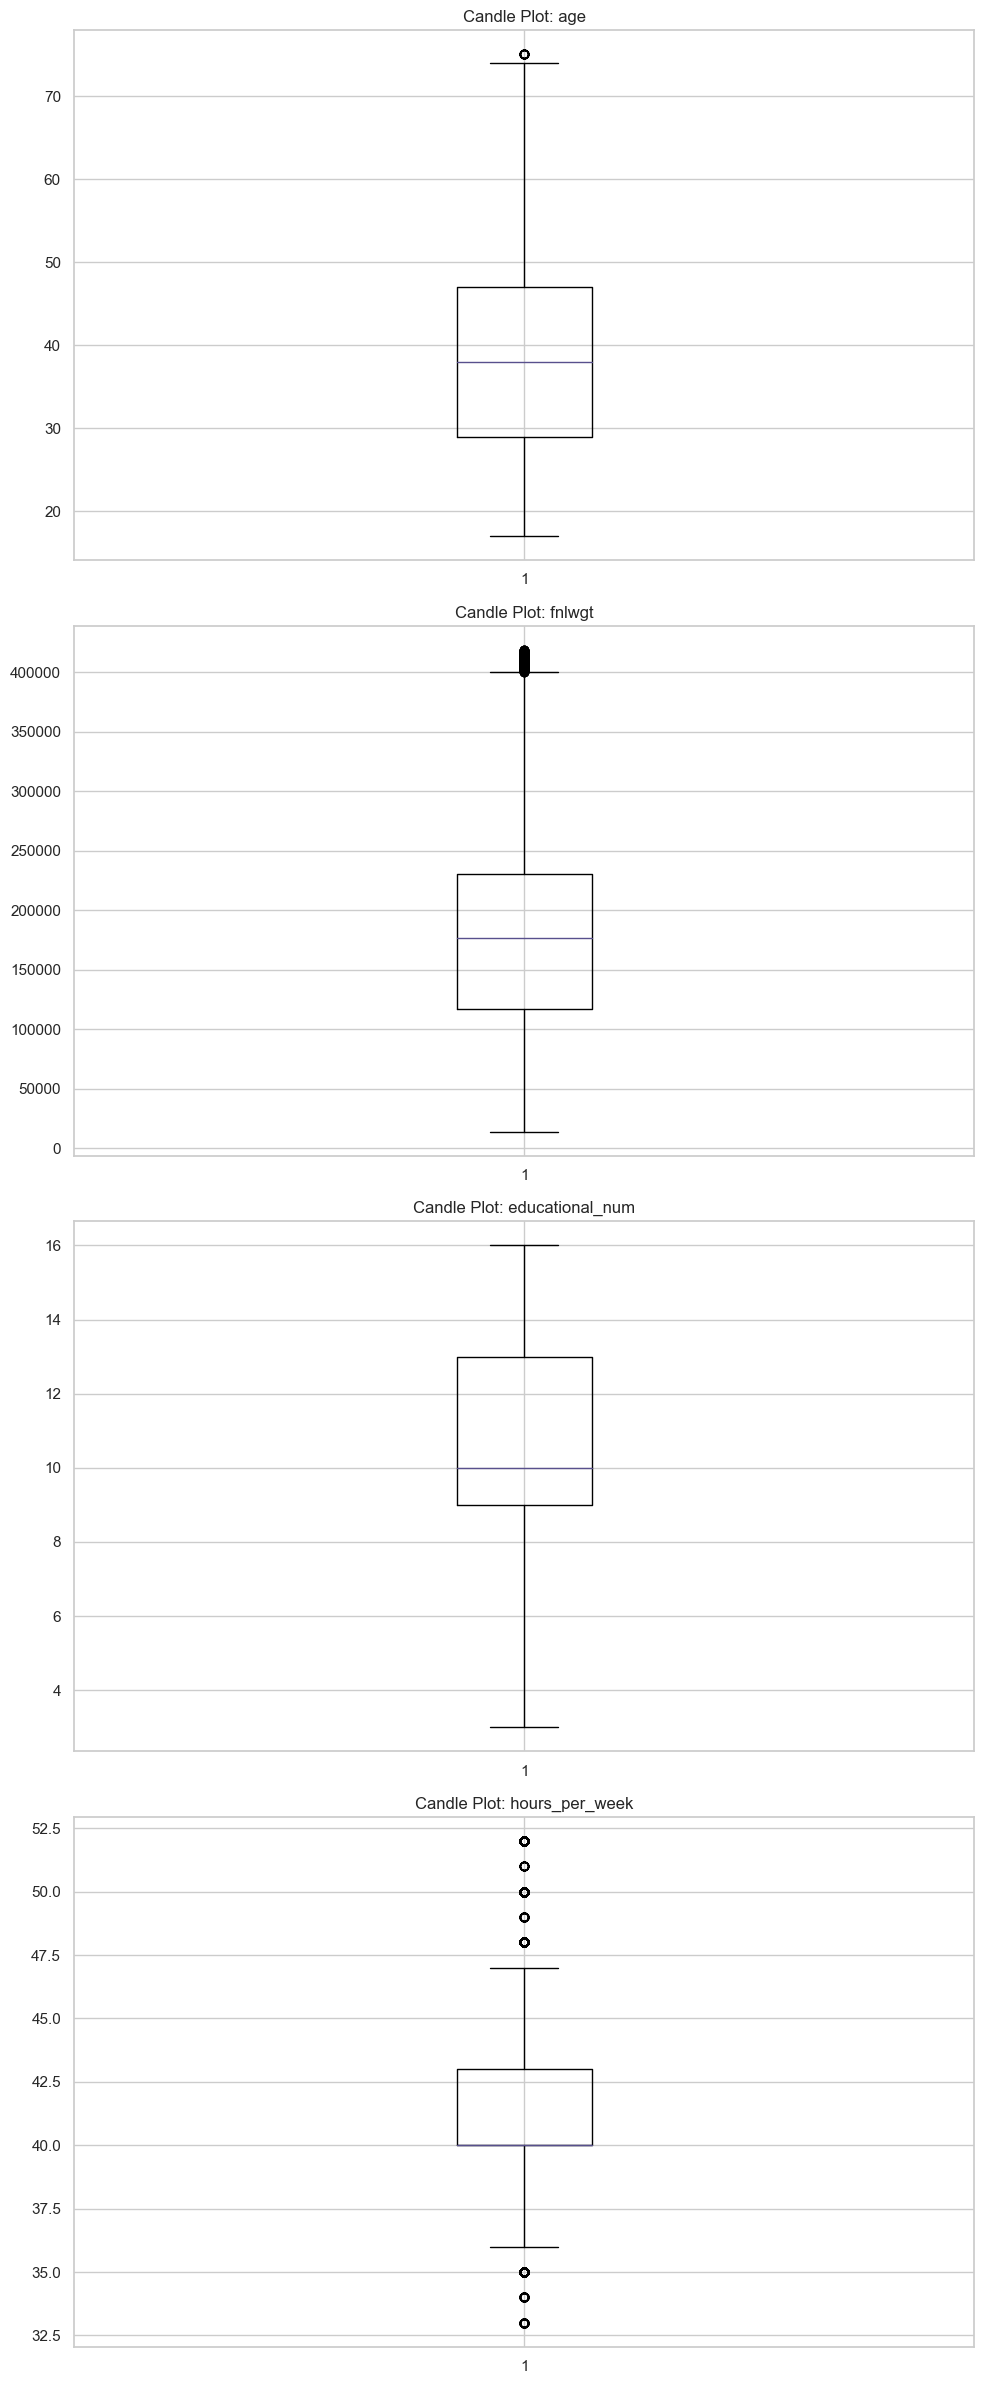

In [2365]:

def detect_outliers(data, numeric_cols):
    outliers = {}
    
    # Loop through numeric columns
    for col in numeric_cols:
        # Calculate the lower and upper quantiles
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Detect outliers
        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        
        # Save outliers for the column
        outliers[col] = col_outliers
    
    return outliers

def remove_outliers(data, outliers):
    # Loop through columns with outliers
    for col, col_outliers in outliers.items():
        # Remove outliers from the data
        data = data[~data[col].isin(col_outliers)]
    
    return data



# Detect outliers
outliers = detect_outliers(df, numeric_cols)

# Remove outliers
df_cleaned = remove_outliers(df, outliers)

plot_data(df_cleaned,numeric_cols)

df=df_cleaned.copy()

In [2367]:
df['educational_num']

0         7
1         9
2        12
3        10
8        10
         ..
48836    10
48837    12
48838     9
48839     9
48841     9
Name: educational_num, Length: 31980, dtype: int64

In [2368]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'age_category'],
      dtype='object')

In [2369]:
df.drop('age_category',axis=1,inplace=True)

In [2370]:
df.to_csv('modified_data.csv',index=False)

KDE plots

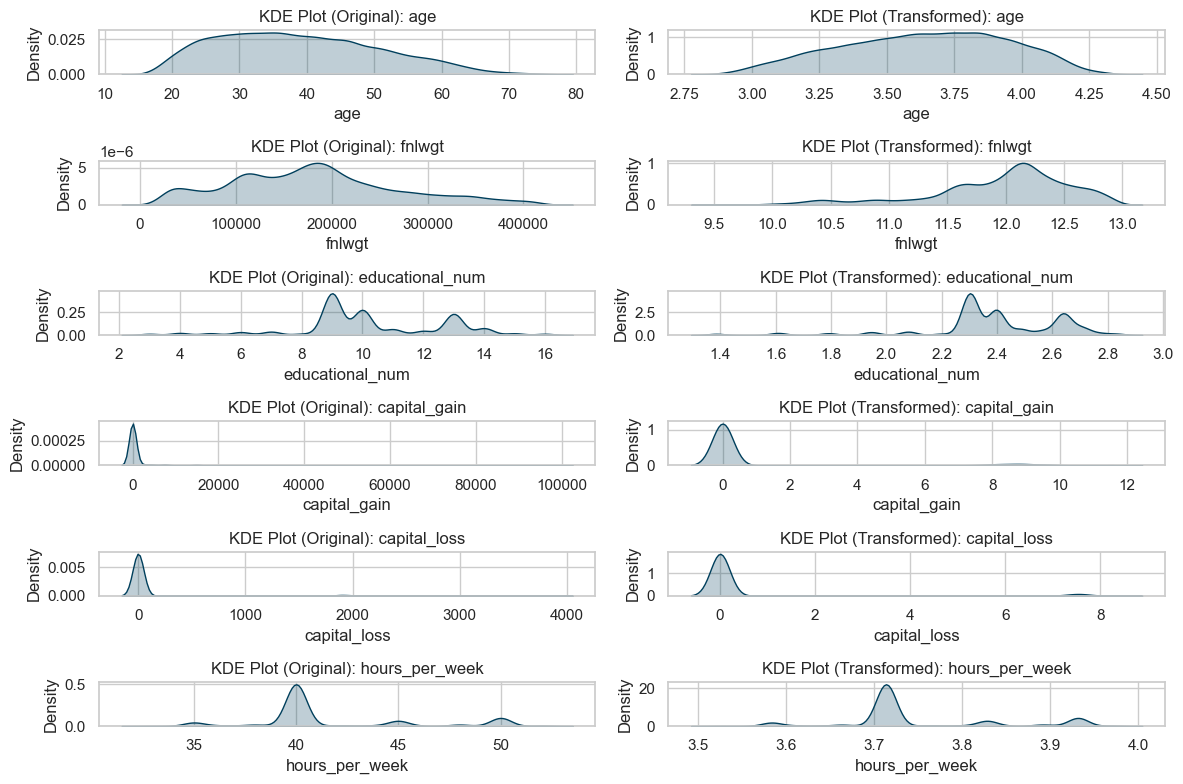

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'age_category'],
      dtype='object')

In [2274]:

#Get the list of numeric columns
numeric_cols = numerical_columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through numeric columns and create KDE plots
for i, col in enumerate(numeric_cols):
    # Create a new subplot for each column
    plt.subplot(len(numeric_cols), 2, 2*i + 1)
    
    # Plot the KDE plot for the original data
    sns.kdeplot(df[col], shade=True)
    
    # Set the x-label, y-label, and title for the subplot
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE Plot (Original): {col}')
    
    # Create a new subplot for the transformed data
    plt.subplot(len(numeric_cols), 2, 2*i + 2)
    
    # Apply log transformation to the column
    transformed_data = np.log1p(df[col])
    
    # Plot the KDE plot for the transformed data
    sns.kdeplot(transformed_data, shade=True)
    
    # Set the x-label, y-label, and title for the subplot
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE Plot (Transformed): {col}')
    
    # Replace the column with the transformed data in the DataFrame
    df[col] = transformed_data

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()
df.columns